# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [85]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [86]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [87]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

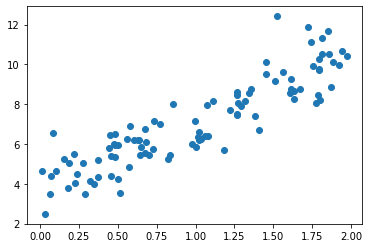

In [88]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [89]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [90]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [91]:
#X_fit[]

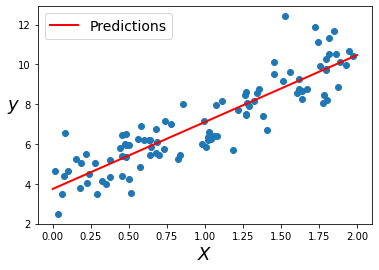

In [92]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [93]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [94]:
X_new.shape

(2, 1)

In [95]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [96]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [97]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [98]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

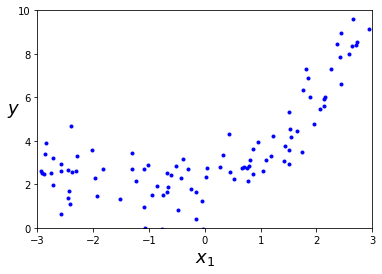

In [99]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [100]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [101]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [102]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [103]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [104]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [105]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

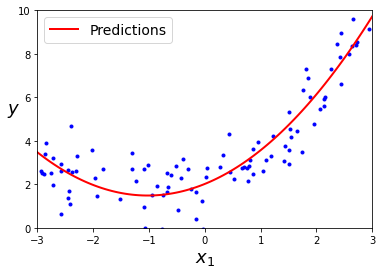

In [106]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [107]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [108]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [109]:
len(X)

1000

In [110]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

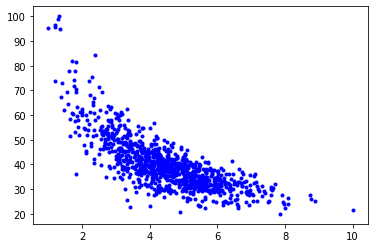

In [111]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)


Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [113]:
#lineal
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


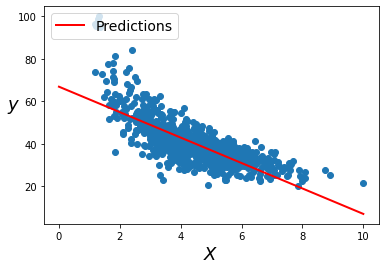

In [114]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_hat = linear_reg.predict(X_train)
r2_RL=r2_score(y_train,y_hat)
mae_RL=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_RL)
print("La Rl tienen un R2 de :",r2_RL)


La RL tiene un MAE de : 4.905332101451236
La Rl tienen un R2 de : 0.5746524649404298


In [116]:
 linear_reg.coef_, linear_reg.intercept_

(array([-5.98882699]), 66.83650741226988)

Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [117]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [118]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

LinearRegression()

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


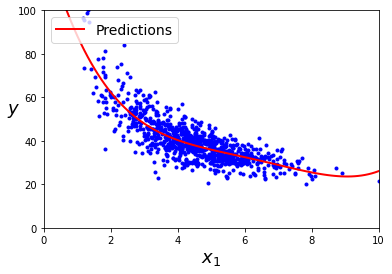

In [119]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [120]:
y_hat = lin_reg.predict(X_poly)
r2_poly=r2_score(y_train,y_hat)
mae_poly=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_poly)
print("La Rl tienen un R2 de :",r2_poly)


La RL tiene un MAE de : 4.448084401293952
La Rl tienen un R2 de : 0.682894284557201


In [121]:
 lin_reg.coef_, lin_reg.intercept_

(array([-5.48365119e+01,  1.24422554e+01, -1.32552709e+00,  5.23673629e-02]),
 132.04001392638722)

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [122]:
from sklearn.linear_model import Ridge
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_rid = Ridge(alpha=0.1)
lin_reg_rid.fit(X_poly, y_train)

Ridge(alpha=0.1)

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


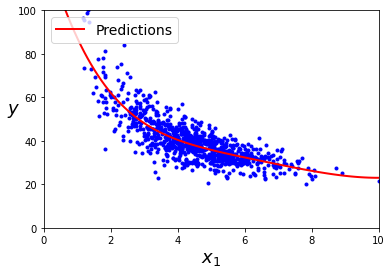

In [123]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_rid.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [124]:
y_hat = lin_reg_rid.predict(X_poly)
r2_rid=r2_score(y_train,y_hat)
mae_rid=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_rid)
print("La Rl tienen un R2 de :",r2_rid)

La RL tiene un MAE de : 4.4380983692261875
La Rl tienen un R2 de : 0.6833284661964635


In [125]:
lin_reg_rid.coef_, lin_reg_rid.intercept_

(array([-5.49381114e+01,  1.33397222e+01, -1.67727452e+00,  1.01231133e-01,
        -2.27155910e-03]),
 130.5211754055971)

In [126]:
from sklearn import linear_model
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_lasso = linear_model.Lasso(alpha=0.01)
lin_reg_lasso.fit(X_poly, y_train)

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+04, tolerance: 9.914e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


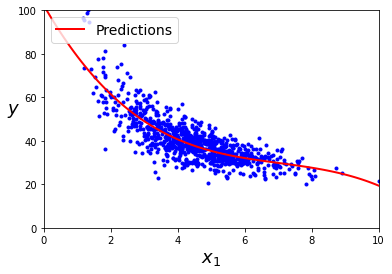

In [127]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_lasso.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [128]:
y_hat = lin_reg_lasso.predict(X_poly)
r2_lasso=r2_score(y_train,y_hat)
mae_lasso=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_lasso)
print("La Rl tienen un R2 de :",r2_lasso)

La RL tiene un MAE de : 4.455103229226279
La Rl tienen un R2 de : 0.674293986804317


In [129]:
 lin_reg_lasso.coef_, lin_reg_lasso.intercept_

(array([-26.81247024,   3.5135565 ,  -0.16619053]), 102.36702745127026)

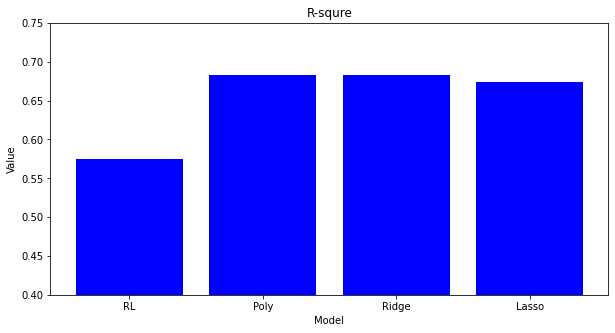

In [130]:
r2s=[r2_RL,r2_poly,r2_rid,r2_lasso]
names=["RL","Poly","Ridge","Lasso"]

fig = plt.figure(figsize = (10, 5))
plt.ylim(0.4,0.75)
# creating the bar plot
plt.bar(names, r2s, color ='blue',
        width = 0.8)
 
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("R-squre")
plt.show()

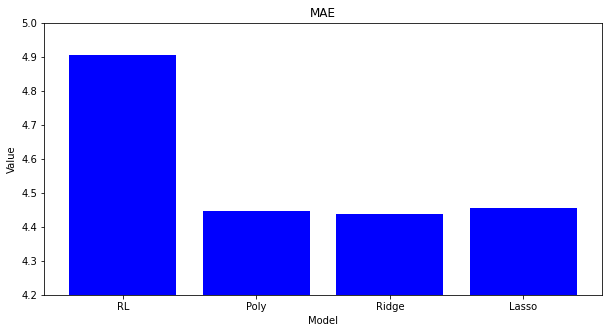

In [131]:
r2s=[mae_RL,mae_poly,mae_rid,mae_lasso]
names=["RL","Poly","Ridge","Lasso"]

fig = plt.figure(figsize = (10, 5))
plt.ylim(4.2,5)
# creating the bar plot
plt.bar(names, r2s, color ='blue',
        width = 0.8)
 
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("MAE")
plt.show()

In [132]:
#El mejor modelo es Ridge, usemos la data de validacion para comprobar su buen desempeño con datos reales
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_rid = Ridge(alpha=0.1)
lin_reg_rid.fit(X_poly, y_train)


Ridge(alpha=0.1)

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


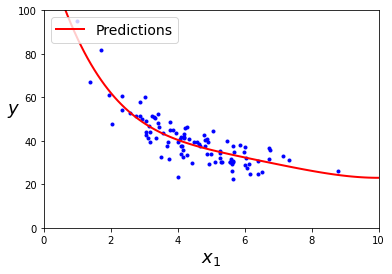

In [133]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_rid.predict(X_new_poly)
plt.plot(X_test, y_test, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [134]:
X_poly = poly_features.fit_transform(X_test)
y_hat = lin_reg_rid.predict(X_poly)
r2_rid=r2_score(y_test,y_hat)
mae_rid=mean_absolute_error(y_test,y_hat)
print("La RL tiene un MAE de :",mae_rid)
print("La Rl tienen un R2 de :",r2_rid)

La RL tiene un MAE de : 4.36527782065028
La Rl tienen un R2 de : 0.7721140252339931


Comprobamos que Ridge tiene un buen desempeño aun con nueva data de validacion.

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Después de realizar los 4 modelos y ajustar sus hiper parámetros, encontramos que el modelo con mas desempeño es el que implementa Ridge, con una potencia de 5 y un Alpha de 0.1, al se polinomial el modelo se pudo ajustar adecuadamente a los datos y gracias al Alpha muy bajo logro hacerlo sin sobre entrenarse.
Se utilizo un Split de 10% para test data y un 90% para entrenamiento.
Al final se obtuvo un MAE de 4.36 y R2 de 0.77, esto significa que el modelo representa correctamente un 77% de la data, aun con información de validación, por lo tanto, lo considero un buen modelo.


#Ejercicio 2

Realiza la regresión polinomial de los siguientes datos:

In [135]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [137]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [138]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


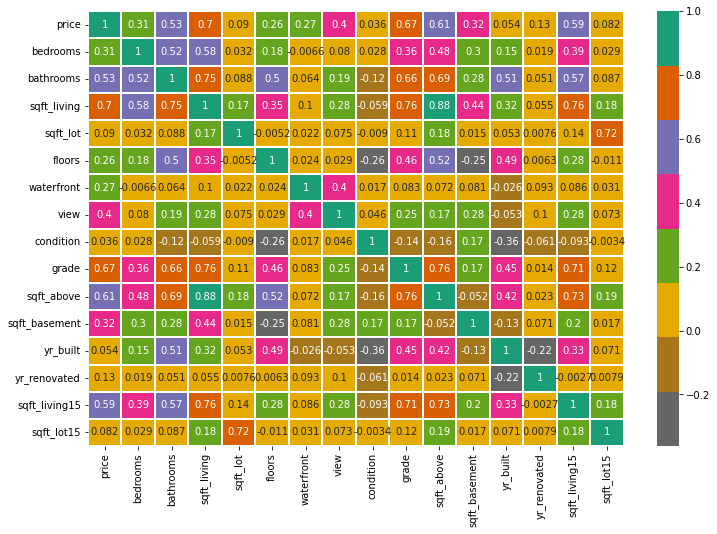

In [139]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [140]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [142]:
#lineal
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_hat = linear_reg.predict(X_train)
r2_RL=r2_score(y_train,y_hat)
mae_RL=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_RL)
print("La Rl tienen un R2 de :",r2_RL)


La RL tiene un MAE de : 139269.3293911536
La Rl tienen un R2 de : 0.6529196653133834


In [144]:
 linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750272e+01,  6.02175567e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.26274158]))

Regresión Múltiple Polinomial.
Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [145]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [146]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [147]:
y_hat = lin_reg.predict(X_poly)
r2_poly=r2_score(y_train,y_hat)
mae_poly=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_poly)
print("La Rl tienen un R2 de :",r2_poly)

La RL tiene un MAE de : 114477.44106569306
La Rl tienen un R2 de : 0.7987854272142794


In [148]:
 lin_reg.coef_, lin_reg.intercept_

(array([[-3.16551419e-06, -5.02278584e-05,  1.96386286e-05, ...,
          1.19107323e-11,  2.36375848e-13,  1.04201781e-15]]),
 array([1614972.7668589]))

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

In [149]:
from sklearn.linear_model import Ridge
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_rid = Ridge(alpha=0.1)
lin_reg_rid.fit(X_poly, y_train)

Ridge(alpha=0.1)

In [150]:
y_hat = lin_reg_rid.predict(X_poly)
r2_rid=r2_score(y_train,y_hat)
mae_rid=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_rid)
print("La Rl tienen un R2 de :",r2_rid)

La RL tiene un MAE de : 123226.4913058388
La Rl tienen un R2 de : 0.7467105161057888


In [151]:
lin_reg_rid.coef_, lin_reg_rid.intercept_

(array([[ 8.42618058e+05, -8.71096681e+05, -6.85420021e+02,
         -2.79565303e+01, -1.43571477e+06, -7.81224336e+05,
         -4.95768172e+05,  5.19761236e+05,  9.53805094e+05,
         -2.06374170e+02, -6.01171873e+01, -8.79719091e+04,
         -3.04317084e+03,  4.09030266e+03, -3.32417791e+01,
          9.62267911e+02,  6.61867471e+03,  2.15176391e+02,
         -2.01234412e-02,  7.11402084e+03, -2.31289680e+04,
          1.54542850e+02, -5.00751521e+03, -5.53250678e+03,
         -2.29234806e+02, -2.43418063e+02, -4.18840073e+02,
         -8.12442013e+00,  1.67266877e+01,  2.11799557e-01,
         -8.59078385e+03,  3.29032584e+01, -1.31603683e-01,
         -2.16914482e+04,  6.40494018e+04,  2.10864349e+03,
         -2.71489187e+03,  2.12573846e+04, -3.76656696e+00,
         -1.56353815e+01,  3.92170646e+02, -1.89269501e+01,
         -1.53845462e+01, -5.16823390e-02, -4.48050184e+01,
         -2.88147105e+02, -3.62004264e+01, -5.19744241e+02,
         -6.63717320e+02, -4.24341389e+0

In [152]:
from sklearn import linear_model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_lasso = linear_model.Lasso(alpha=0.01)
lin_reg_lasso.fit(X_poly, y_train)

c:\Users\israc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [153]:
y_hat = lin_reg_lasso.predict(X_poly)
r2_lasso=r2_score(y_train,y_hat)
mae_lasso=mean_absolute_error(y_train,y_hat)
print("La RL tiene un MAE de :",mae_lasso)
print("La Rl tienen un R2 de :",r2_lasso)

La RL tiene un MAE de : 124944.91421742126
La Rl tienen un R2 de : 0.7390905150209914


In [154]:
 lin_reg_lasso.coef_, lin_reg_lasso.intercept_

(array([ 1.25684705e+05,  1.54350174e+05,  7.92190139e+01, -3.03172178e+00,
        -4.70895356e+04,  3.53555198e+05,  7.33359831e+04,  1.35738145e+05,
         1.80465767e+05, -1.83464693e+02, -6.13302697e+01, -3.81707547e+03,
        -2.48456102e+02,  1.34683748e+02, -1.53453676e+00,  1.07519075e+03,
        -3.10505874e+03, -2.05513397e+01, -1.79172497e-01,  8.12808531e+03,
        -2.24646783e+04, -8.25724115e+01, -1.72096298e+03, -3.86300640e+03,
         7.52665257e+00,  3.01136886e-01, -6.24775085e+01,  3.88057617e-02,
         1.88876465e+01,  2.66485946e-01,  1.16830578e+03,  4.55832094e+01,
        -2.29415204e-02, -2.69480970e+04,  5.44888192e+04,  6.03072057e+03,
        -1.99643816e+04,  1.80648871e+04, -1.33102480e+01, -3.78775994e+01,
        -6.85890784e+01, -2.72539374e+01, -3.38904232e+01,  1.37046100e-01,
         1.96410666e-02, -1.72766235e-04,  4.40022186e+00, -1.00075451e+02,
         3.25194200e+01, -1.24921491e+01,  2.25089869e+01, -5.33914553e-02,
         2.7

Finalmente gráfica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

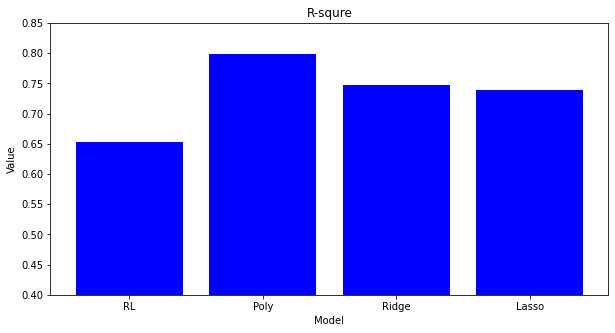

In [155]:
r2s=[r2_RL,r2_poly,r2_rid,r2_lasso]
names=["RL","Poly","Ridge","Lasso"]

fig = plt.figure(figsize = (10, 5))
plt.ylim(0.4,0.85)
# creating the bar plot
plt.bar(names, r2s, color ='blue',
        width = 0.8)
 
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("R-squre")
plt.show()

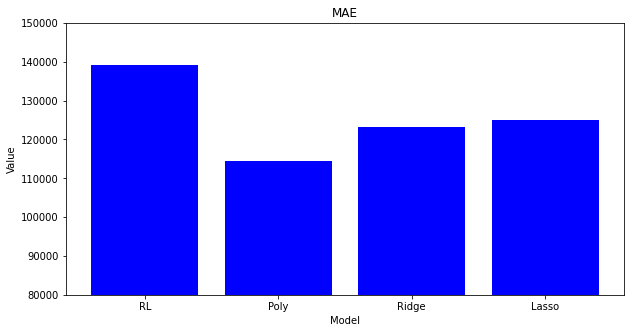

In [156]:
r2s=[mae_RL,mae_poly,mae_rid,mae_lasso]
names=["RL","Poly","Ridge","Lasso"]

fig = plt.figure(figsize = (10, 5))
plt.ylim(80000,150000)
# creating the bar plot
plt.bar(names, r2s, color ='blue',
        width = 0.8)
 
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("MAE")
plt.show()

In [157]:
#El mejor modelo es Poly, usemos la data de validacion para comprobar su buen desempeño con datos reales

In [158]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [159]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [160]:
X_poly = poly_features.fit_transform(X_test)
y_hat = lin_reg.predict(X_poly)
r2_poly=r2_score(y_test,y_hat)
mae_poly=mean_absolute_error(y_test,y_hat)
print("La RL tiene un MAE de :",mae_poly)
print("La Rl tienen un R2 de :",r2_poly)

La RL tiene un MAE de : 167400.8643179445
La Rl tienen un R2 de : -2.5385851787604565


In [161]:
 lin_reg.coef_, lin_reg.intercept_

(array([[-3.16551419e-06, -5.02278584e-05,  1.96386286e-05, ...,
          1.19107323e-11,  2.36375848e-13,  1.04201781e-15]]),
 array([1614972.7668589]))

Vemos que aunque en entrenamiento el modelo poly tuvo un buen desempeño, al usar la dara de validacion no reflejo una r2 correcta, por lo tanto probemos el segundo mejor modelo que es ridge:

In [163]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg_rid = Ridge(alpha=0.1)
lin_reg_rid.fit(X_poly, y_train)

Ridge(alpha=0.1)

In [164]:
X_poly = poly_features.fit_transform(X_test)
y_hat = lin_reg_rid.predict(X_poly)
r2_rid=r2_score(y_test,y_hat)
mae_rid=mean_absolute_error(y_test,y_hat)
print("La RL tiene un MAE de :",mae_rid)
print("La Rl tienen un R2 de :",r2_rid)

La RL tiene un MAE de : 121263.94901502308
La Rl tienen un R2 de : 0.7797434765029538


Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

Paso algo similar que en el ejercicio de una sola variable, al final el mejor modelo fue ridge, por las mismas razones, podemos hacer un modelo complejo, sin el peligro de sobre entrenamiento gracias a la alpha.
La data de validacion llega a tener una R_squre de 77.97%, el cual es muy bueno.

Agrega las conclusiones

En conclusion, podemos usar regresiones complejas y regularlas con ridge para lograr un desempeño superior, sin embargo, es necesario probar varias opciones y hacer un split de informacion de entrenamiento y de test para asegurarnos de que nuestro modelo se desempeñe correctamente en la vida real.